### Crude Oil

## 7:3

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [112]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Crude Oil.csv')
df1=df.reset_index()['Price']

In [83]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [84]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [85]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [86]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [87]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [88]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1667
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0192
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0043
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0015
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0012
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0010
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0011
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 9.3713e-04
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 8.4259e-04
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 7.4544e-04
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 7.5747e-04
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 6.7740e-04
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 6.6852e-04
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 6.0606e-04
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1

In [90]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [91]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [92]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 55.6229071676206


In [93]:
# Lấy 100 phần tử cuối cùng từ test_data làm đầu vào ban đầu
x_input = test_data[-100:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    x_input = np.array(temp_input[-n_steps:])  # Đảm bảo luôn lấy 100 phần tử cuối cùng
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())  # Thêm giá trị dự báo mới vào temp_input
    lst_output.extend(yhat.tolist())  # Lưu giá trị dự báo vào lst_output
    i += 1

# lst_output sẽ chứa 30 giá trị dự báo cho 30 ngày tiếp theo


0 day input [0.6243724  0.62226492 0.62294676 0.61767805 0.61619042 0.61160355
 0.6154466  0.61569454 0.6182979  0.613835   0.6191037  0.61718217
 0.61637637 0.62747164 0.62939317 0.62685179 0.6256121  0.63745119
 0.64166615 0.64420752 0.64048844 0.62995103 0.6284634  0.63026096
 0.62623195 0.6292692  0.62734767 0.6337321  0.62982706 0.63243042
 0.62424843 0.61817393 0.62040538 0.6211492  0.61501271 0.60602492
 0.6008182  0.60150003 0.60478522 0.59784293 0.5992066  0.60503316
 0.60410339 0.59914461 0.59951652 0.59598339 0.59654125 0.59437178
 0.5857559  0.58526003 0.58079712 0.58445422 0.5817269  0.58383438
 0.58402033 0.57912354 0.58792537 0.5861898  0.57726399 0.57714002
 0.58817331 0.58631377 0.58606583 0.58092109 0.58203682 0.58240873
 0.57782186 0.57050766 0.56734643 0.56238765 0.5581107  0.56003223
 0.55953635 0.56802827 0.5658588  0.57143743 0.57577636 0.5666646
 0.56939193 0.56368933 0.55550735 0.56604475 0.56257361 0.55941238
 0.55910246 0.56945391 0.56579681 0.56672659 0.5560

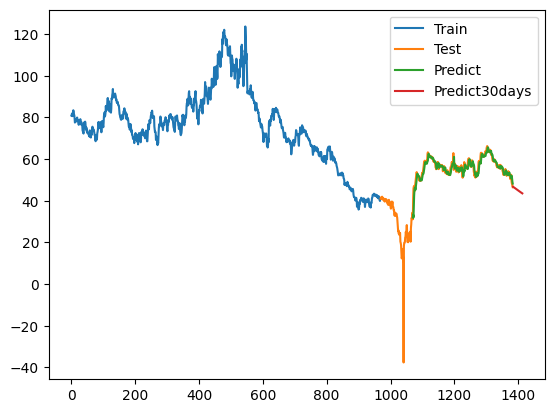

In [95]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
predict_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(predict_data_index,(y_pred))
prediect_data_30days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_30days,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

### Gasoline RBOB

## 7:3

In [114]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('Gasoline RBOB.csv')
df1=df.reset_index()['Price']

In [115]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [116]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [117]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [118]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [119]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [120]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [121]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0833
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0115
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0059
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0041
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0034
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0029
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0032
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0028
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0026
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0027
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0024
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0021
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0022
Epoch 15/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - lo

In [122]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [123]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [124]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 1.252938811801225


In [125]:
# Lấy 100 phần tử cuối cùng từ test_data làm đầu vào ban đầu
x_input = test_data[-100:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    x_input = np.array(temp_input[-n_steps:])  # Đảm bảo luôn lấy 100 phần tử cuối cùng
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())  # Thêm giá trị dự báo mới vào temp_input
    lst_output.extend(yhat.tolist())  # Lưu giá trị dự báo vào lst_output
    i += 1

# lst_output sẽ chứa 30 giá trị dự báo cho 30 ngày tiếp theo


0 day input [0.28249456 0.39547648 0.28347563 0.29087342 0.29182797 0.29310071
 0.2934454  0.40873416 0.28655141 0.28397942 0.28509307 0.28329002
 0.39255979 0.28456276 0.28132789 0.28427109 0.2761574  0.27769529
 0.38195365 0.27568012 0.27170282 0.28008167 0.27989606 0.27862332
 0.35623376 0.27228615 0.26801718 0.26921037 0.27228615 0.27172933
 0.35517315 0.27284298 0.27793392 0.28241502 0.27764225 0.27589224
 0.3483587  0.27400965 0.27369147 0.27679376 0.27186191 0.27162327
 0.33396086 0.26889219 0.27345283 0.27162327 0.26968765 0.26780506
 0.31566527 0.26319139 0.26883916 0.27371798 0.26687702 0.26348306
 0.32468049 0.27822559 0.27782786 0.27692634 0.27175585 0.27111948
 0.27459299 0.27127857 0.26207774 0.25738453 0.25208146 0.2490587
 0.23744498 0.25274434 0.25080872 0.25733149 0.2528504  0.25539587
 0.24486928 0.2568277  0.24643369 0.25346025 0.25194888 0.24513443
 0.22630853 0.25489208 0.25359283 0.25343374 0.25481254 0.24115713
 0.23797529 0.2621838  0.2571724  0.25757013 0.2559

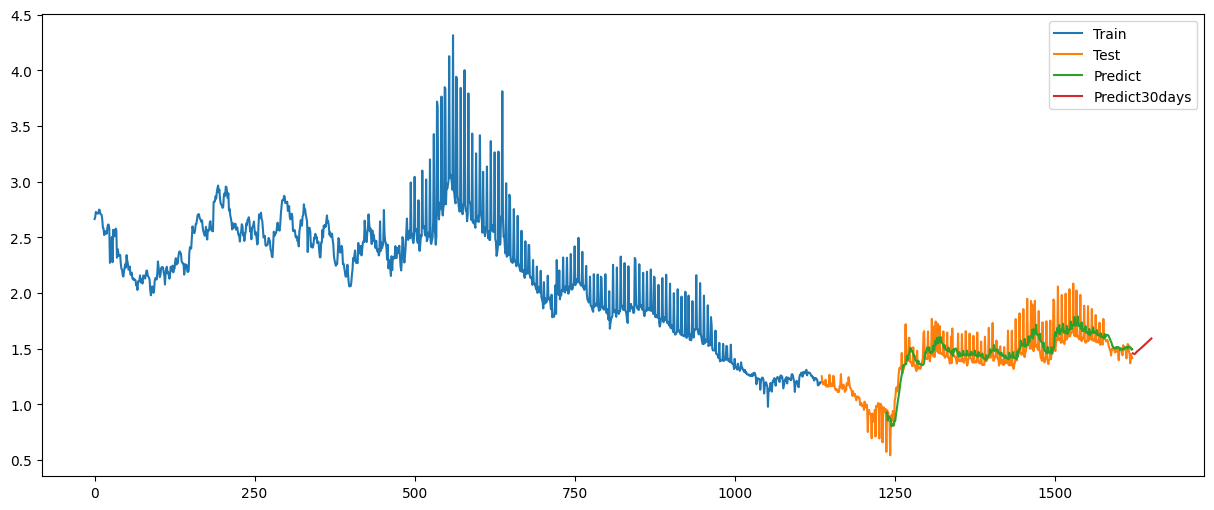

In [131]:
# 14.Vẽ hình
plt.figure(figsize=(15, 6)) 
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
predict_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(predict_data_index,(y_pred))
prediect_data_30days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_30days,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

### Heating Oil

## 7:3

In [132]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('Heating Oil.csv')
df1=df.reset_index()['Price']

In [133]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [134]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [136]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [137]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [138]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [139]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [140]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.1658
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0130
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0077
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0064
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0045
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0030
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0017
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0014
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0011
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 9.4533e-04
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 8.6184e-04
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 7.9668e-04
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 8.2430e-04
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 9.9862e-04
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━

In [141]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [142]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [143]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 1.6148483097146584


In [144]:
# Lấy 100 phần tử cuối cùng từ test_data làm đầu vào ban đầu
x_input = test_data[-100:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    x_input = np.array(temp_input[-n_steps:])  # Đảm bảo luôn lấy 100 phần tử cuối cùng
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())  # Thêm giá trị dự báo mới vào temp_input
    lst_output.extend(yhat.tolist())  # Lưu giá trị dự báo vào lst_output
    i += 1

# lst_output sẽ chứa 30 giá trị dự báo cho 30 ngày tiếp theo


0 day input [0.32335912 0.3281989  0.33432044 0.32616575 0.3201105  0.31558011
 0.31823204 0.31672928 0.31951381 0.31540331 0.32203315 0.32260773
 0.32428729 0.3279116  0.32503867 0.31922652 0.31840884 0.32877348
 0.32890608 0.33317127 0.33007735 0.32276243 0.32238674 0.32525967
 0.32057459 0.32271823 0.32194475 0.32645304 0.31701657 0.31971271
 0.31646409 0.31005525 0.30859669 0.30906077 0.30446409 0.30121547
 0.30090608 0.30280663 0.30486188 0.30276243 0.29955801 0.30424309
 0.30888398 0.30497238 0.30024309 0.2999558  0.30375691 0.30534807
 0.3039337  0.30581215 0.30704972 0.30990055 0.31067403 0.31071823
 0.31025414 0.30731492 0.31228729 0.3118674  0.30676243 0.30148066
 0.31396685 0.31511602 0.31113812 0.30590055 0.31122652 0.3121989
 0.31158011 0.30081768 0.29356906 0.28658564 0.28327072 0.28687293
 0.28510497 0.28769061 0.28444199 0.28662983 0.2878011  0.28030939
 0.28464088 0.28444199 0.27122652 0.28320442 0.28181215 0.28247514
 0.28523757 0.29038674 0.28654144 0.28853039 0.2815

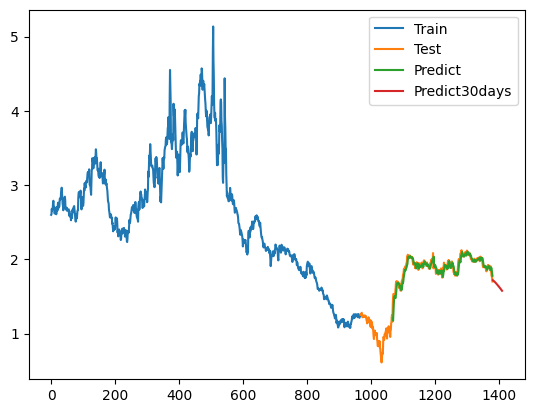

In [146]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
predict_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(predict_data_index,(y_pred))
prediect_data_30days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_30days,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()